# **Monopoly Analysis**

Version 1.0

Only player movement + prison + no money mechanics

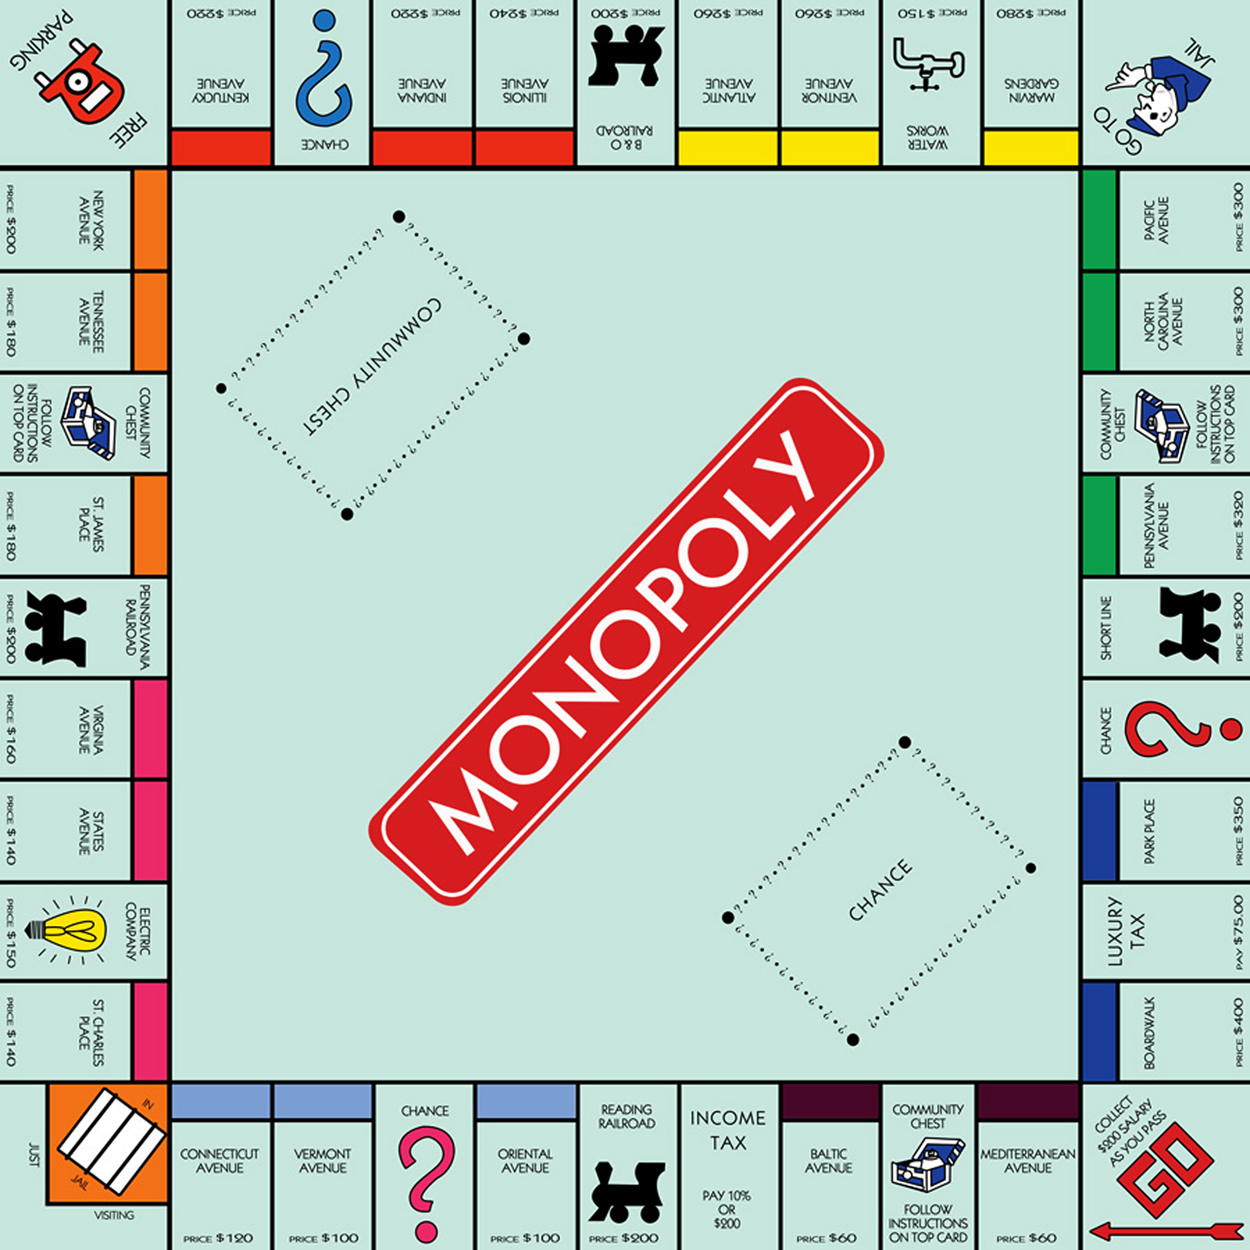

In [3]:
from IPython.display import Image
Image(filename='monopoly.jpg') 

## Mapping Monopoly Map

In [3]:
import random

**Monopoly Player Preference**

***

Jail Preference

    1 = Always use jailcard or dice
    2 = Always use jailcard or pay
    3 = Always pay
    4 = Always dice

**Monopoly Random**

****

Monopoly Community Chest

    1 = Advance to Go [1]
    2 = Get 200
    3 = Pay 50
    4 = Get 50
    5 = Get out jail card
    6 = Go to jail [11]
    7 = Get 50 from every player
    8 = Get 20
    9 = Get 10 from every player
    10 = Get 100
    11 = Pay 50
    12 = Pay 50
    13 = Get 25
    14 = Pay 40 per house and 115 per hotel
    15 = Get 10
    16 = Get 100

****

Monopoly Chance Chest

    1 = Advance to Go [1]
    2 = Advance to Illinois Ave (if go to go get 200) [25]
    3 = Advance to St Charles Place (if go to go get 200) [12]
    4 = Advance to nearest utility (if unowen you can buy, if owned pay 10x) [13, 29]
    5 = Advance to nearest railroad (if unowen you can buy, if owned pay 2x) [6, 16, 26, 36]
    6 = Advance to nearest railroad (if unowen you can buy, if owned pay 2x) [6, 16, 26, 36]
    7 = Get 50
    8 = Get out jail card
    9 = Go back 3 spaces
    10 = Go to jail
    11 = Pay 25 per house and 100 per hotel
    12 = Pay 15
    13 = Go to Reading Railroad (if go to go get 200) [6]
    14 = Go to Boardwalk [40]
    15 = Pay 50 for every player
    16 = Get 150

In [104]:
class Monopoly:
    def __init__(self):
        self.position = 1
        self.diceCount = 0

        self.diceGen1 = 0
        self.diceGen2 = 0
        self.diceGen3 = 0

        self.positionGen1 = 0
        self.positionGen2 = 0
        self.positionGen3 = 0

    def DiceRandom(self):
        self.dice1 = random.randrange(1, 7)
        self.dice2 = random.randrange(1, 7)

    def MapRun(self):
        if self.position >= 41:
            self.position = self.position - 40

        #Prison
        elif self.position == 31:
            self.position = 11

        #Comunity Chest
        elif self.position == 3 or self.position == 18 or self.position == 34:
            i = random.randrange(1, 17)
            if i == 1:
                self.position = 1
            elif i == 6:
                self.position = 11

        #Chance Chest
        elif self.position == 8 or self.position == 23 or self.position == 37:
            i = random.randrange(1, 17)
            if i == 1:
                self.position = 1
            elif i == 2:
                self.position = 25
            elif i == 3:
                self.position = 12
            elif i == 4:
                if self.position == 8:
                    self.position = 13
                elif self.position == 23:
                    self.position == 29
                elif self.position == 37:
                    self.position == 13
            elif i == 5 or i == 6:
                if self.position == 8:
                    self.position = 16
                elif self.position == 23:
                    self.position == 26
                elif self.position == 37:
                    self.position == 6
            elif i == 9:
                self.position -= 3
            elif i == 10:
                self.position = 11
            elif i == 13:
                self.position = 6
            elif i == 14:
                self.position = 40

    def Run(self):
            self.DiceRandom()
            diceResult = self.dice1 + self.dice2

            #DoubleDice
            if self.dice1 == self.dice2:
                if self.diceCount == 0:
                    self.diceGen1 = diceResult
                    self.position += diceResult
                    self.diceCount += 1

                    self.MapRun()
                    self.positionGen1 = self.position
                    self.Run()
                elif self.diceCount == 1:
                    self.diceGen2 = diceResult
                    self.position += diceResult
                    self.diceCount += 1

                    self.MapRun()
                    self.positionGen2 = self.position
                    self.Run()
                elif self.diceCount == 2:
                    self.diceGen3 = diceResult
                    self.position = 11
                    self.positionGen3 = self.position
                    
                    self.diceCount = 0
            #ExDoubleDice
            elif self.diceCount == 1:
                self.position += diceResult
                self.diceGen2 = diceResult
                self.diceCount = 0

                self.MapRun()
                self.positionGen2 = self.position
            elif self.diceCount == 2:
                self.position += diceResult
                self.diceGen3 = diceResult
                self.diceCount = 0

                self.MapRun()
                self.positionGen3 = self.position

            #NotDoubleDice
            else:
                self.position += diceResult

                self.diceGen1 = diceResult
                self.diceGen2 = 0
                self.diceGen3 = 0

                self.MapRun()

                self.positionGen1 = self.position
                self.positionGen2 = 0
                self.positionGen3 = 0

    def Info(self):
        x = {"Dice 1": self.diceGen1,
             "Dice 2": self.diceGen2, 
             "Dice 3": self.diceGen3,
             "Position 1": self.positionGen1,
             "Position 2": self.positionGen2,
             "Position 3": self.positionGen3,
             "Current Position": self.position}
        return x

In [159]:
Player1 = Monopoly()

In [166]:
countPosition = {
    "A1": 0,
    "A2": 0,
    "B1": 0,
    "B2": 0,
    "B3": 0,
    "C1": 0,
    "C2": 0,
    "C3": 0,
    "D1": 0,
    "D2": 0,
    "D3": 0,
    "E1": 0,
    "E2": 0,
    "E3": 0,
    "F1": 0,
    "F2": 0,
    "F3": 0,
    "G1": 0,
    "G2": 0,
    "G3": 0,
    "H1": 0,
    "H2": 0,
    "X1": 0,
    "X2": 0,
    "X3": 0,
    "X4": 0,
    "Y1": 0,
    "Y2": 0,
    "I1": 0,
    "I2": 0,
    "I3": 0,
    "J1": 0,
    "J2": 0,
    "J3": 0,
    "K1": 0,
    "K2": 0,
    "S1": 0,
    "S2": 0,
    "S3": 0,
    "S4": 0
}

def Count(i):
    if i == 2:
        countPosition["A1"]+=1
    elif i == 4:
        countPosition["A2"] += 1

    elif i == 7:
        countPosition["B1"] += 1
    elif i == 9:
        countPosition["B2"] += 1
    elif i == 10:
        countPosition["B3"] += 1
    
    elif i == 12:
        countPosition["C1"] += 1
    elif i == 14:
        countPosition["C2"] += 1
    elif i == 15:
        countPosition["C3"] += 1

    elif i == 17:
        countPosition["D1"] += 1
    elif i == 19:
        countPosition["D2"] += 1
    elif i == 20:
        countPosition["D3"] += 1
    
    elif i == 22:
        countPosition["E1"] += 1
    elif i == 24:
        countPosition["E2"] += 1
    elif i == 25:
        countPosition["E3"] += 1

    elif i == 27:
        countPosition["F1"] += 1
    elif i == 28:
        countPosition["F2"] += 1
    elif i == 30:
        countPosition["F3"] += 1

    elif i == 32:
        countPosition["G1"] += 1
    elif i == 33:
        countPosition["G2"] += 1
    elif i == 35:
        countPosition["G3"] += 1

    elif i == 38:
        countPosition["H1"] += 1
    elif i == 40:
        countPosition["H2"] += 1

    elif i == 6:
        countPosition["X1"] += 1
    elif i == 16:
        countPosition["X2"] += 1
    elif i == 26:
        countPosition["X3"] += 1
    elif i == 36:
        countPosition["X4"] += 1
    
    elif i == 13:
        countPosition["Y1"] += 1
    elif i == 29:
        countPosition["Y2"] += 1

    elif i == 8:
        countPosition["I1"] += 1
    elif i == 23:
        countPosition["I2"] += 1
    elif i == 37:
        countPosition["I3"] += 1

    elif i == 3:
        countPosition["J1"] += 1
    elif i == 18:
        countPosition["J2"] += 1
    elif i == 34:
        countPosition["J3"] += 1

    elif i == 5:
        countPosition["K1"] += 1
    elif i == 39:
        countPosition["K2"] += 1

    elif i == 1:
        countPosition["S1"] += 1
    elif i == 11:
        countPosition["S2"] += 1
    elif i == 21:
        countPosition["S3"] += 1
    elif i == 31:
        countPosition["S4"] += 1
    

    
    return countPosition
    

In [168]:
for i in range(100000):
    Player1.Run()
    x = Player1.Info()
    countPosition = Count(x.get("Position 1"))
    countPosition = Count(x.get("Position 2"))
    countPosition = Count(x.get("Position 3"))

    print(i, end="\r")

print(countPosition)

{'A1': 4432, 'A2': 4539, 'B1': 4927, 'B2': 5383, 'B3': 5430, 'C1': 6211, 'C2': 5746, 'C3': 5843, 'D1': 6779, 'D2': 6976, 'D3': 7187, 'E1': 6676, 'E2': 6669, 'E3': 7368, 'F1': 6492, 'F2': 6387, 'F3': 6208, 'G1': 6369, 'G2': 6258, 'G3': 5767, 'H1': 5192, 'H2': 6057, 'X1': 5676, 'X2': 6791, 'X3': 6506, 'X4': 5771, 'Y1': 5690, 'Y2': 0, 'I1': 3308, 'I2': 4154, 'I3': 3303, 'J1': 4382, 'J2': 6406, 'J3': 5732, 'K1': 4799, 'K2': 5162, 'S1': 5941, 'S2': 13738, 'S3': 6860, 'S4': 923}
